In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('linear reg dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.shape

(243, 15)

In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
## Independent And dependent features
X=df.drop('Classes',axis=1)
y=df['Classes']

In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((194, 11), (194,), (49, 11), (49,))

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

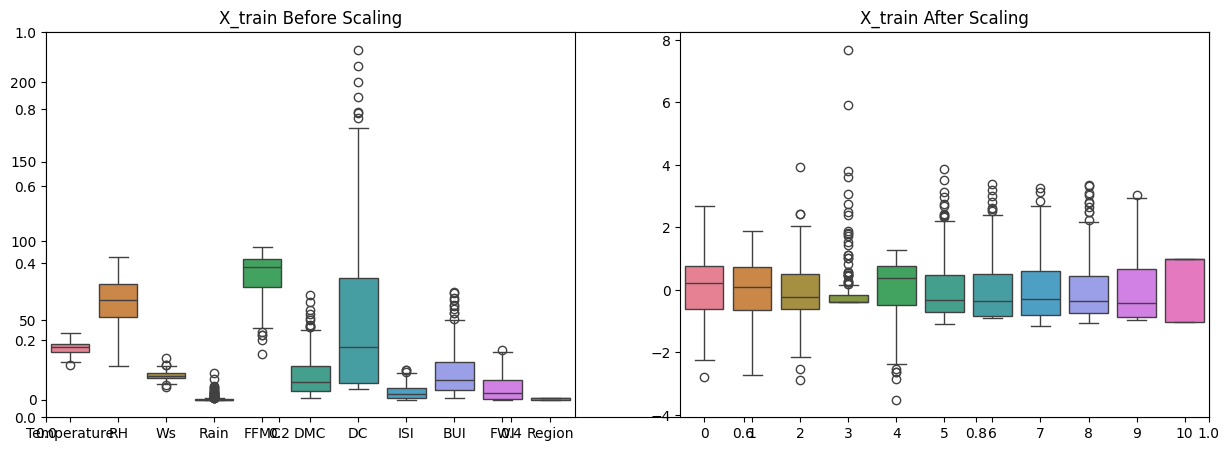

In [15]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [17]:
model = Sequential()

model.add(Dense(64,activation='relu',input_dim=11)) ##first hl
model.add(Dense(32,activation='relu'))#second hl
model.add(Dense(1,activation='sigmoid')) ##third hl

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2,callbacks=[early_stop])

Epoch 1/100


4/4 [==============================] - 2s 135ms/step - loss: 8.2252 - accuracy: 0.5742 - val_loss: 5.1961 - val_accuracy: 0.5385
Epoch 2/100
4/4 [==============================] - 0s 23ms/step - loss: 4.1044 - accuracy: 0.5419 - val_loss: 1.8831 - val_accuracy: 0.4103
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 1.5921 - accuracy: 0.4903 - val_loss: 1.1362 - val_accuracy: 0.6923
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 1.0333 - accuracy: 0.6581 - val_loss: 0.4255 - val_accuracy: 0.8462
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.5264 - accuracy: 0.8258 - val_loss: 0.3716 - val_accuracy: 0.8718
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6200 - accuracy: 0.8452 - val_loss: 0.3990 - val_accuracy: 0.8462
Epoch 7/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6421 - accuracy: 0.8387 - val_loss: 0.3111 - val_accuracy: 0.9231
Epoch 8/100
4/4 [

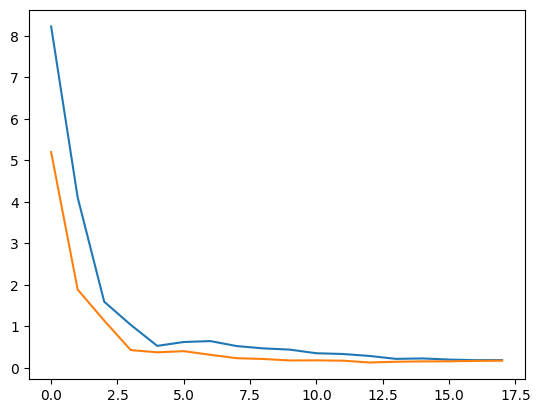

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


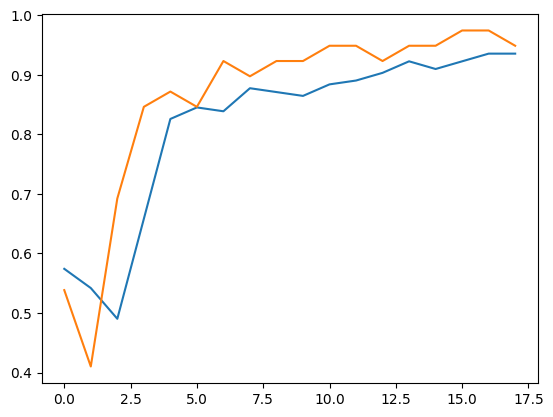

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])